### Data Loading

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file to explore its content and structure
campaign_data = pd.read_csv('Amazon Ads All.csv')

# Display the first few rows of the dataframe and the column names to understand the dataset
campaign_data.head(), campaign_data.columns

(   ADV_ID    AD_ID         SKU     placement_slot  impressions  clicks  \
 0   84373  6370624  9985955750  offsite_mobileweb         1089       0   
 1   66528  3003509  6064714310  offsite_mobileapp            4       0   
 2   88613  9302679  7428981046    offsite_desktop            4       0   
 3   57975  3325755  7489730099    offsite_desktop           13       0   
 4   13386  6532070  6004552148  offsite_mobileweb          246       0   
 
    auction_cost  adjusted_cost hit_day_utc  \
 0         10.89          8.790    02/05/24   
 1          0.08          0.032    02/05/24   
 2          0.08          0.032    02/05/24   
 3          0.26          0.127    02/05/24   
 4          2.46          1.978    02/05/24   
 
                             targeting_secondary                 vertical  \
 0  category=Automotive Replacement Control Arms               Automotive   
 1              category=Canned & Jarred Seafood  Consumer Packaged Goods   
 2                       category

### CLEANING

In [30]:

# Attempt to parse dates in the '%d/%m/%y' format
campaign_data['hit_day_utc_parsed'] = pd.to_datetime(campaign_data['hit_day_utc'], format='%d/%m/%y', errors='coerce')

# Parse remaining unparsed dates in the '%Y-%m-%d %H:%M:%S' format
mask = campaign_data['hit_day_utc_parsed'].isna()
campaign_data.loc[mask, 'hit_day_utc_parsed'] = pd.to_datetime(campaign_data.loc[mask, 'hit_day_utc'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Check for any remaining non-parsed dates
remaining_non_parsed = campaign_data[campaign_data['hit_day_utc_parsed'].isna()]
if not remaining_non_parsed.empty:
    print("Remaining non-parsed dates:")
    print(remaining_non_parsed)


# Print unique months in the parsed 'hit_day_utc_parsed' column
print("Unique months in 'hit_day_utc_parsed':")
print(campaign_data['hit_day_utc_parsed'].dt.month.unique())

# Extract month and day of the week from parsed dates
campaign_data['month_name'] = campaign_data['hit_day_utc_parsed'].dt.strftime('%B')  # Get month names
campaign_data['day_name'] = campaign_data['hit_day_utc_parsed'].dt.strftime('%A')    # Get day names

# Fill missing values in 'vertical' and 'sub_vertical' with 'Unknown'
campaign_data['vertical'].fillna('Unknown', inplace=True)
campaign_data['sub_vertical'].fillna('Unknown', inplace=True)

# Identify the last 6 columns
last_6_columns = campaign_data.columns[-6:]

# Fill missing values in the last 6 columns with 0
campaign_data[last_6_columns] = campaign_data[last_6_columns].fillna(0)

# Display the cleaned dataset
print("Cleaned Campaign Data Sample:")
print(campaign_data.head())

# Inspect the 'hit_day_utc' column to understand its format
print("Sample of 'hit_day_utc' column:")
print(campaign_data['hit_day_utc'].head(10))

# Filter the data where clicks is at least 1
# campaign_data = campaign_data[campaign_data['clicks'] >= 1] # use for below code blocks when not doing for NTB
# campaign_data = campaign_data[(campaign_data['ntb_view_attributed_units_sold'] > 0)] # use for NTB

Unique months in 'hit_day_utc_parsed':
[5 4 3 2]


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65807/2532159690.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  campaign_data['vertical'].fillna('Unknown', inplace=True)
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65807/2532159690.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

Cleaned Campaign Data Sample:
   ADV_ID    AD_ID         SKU     placement_slot  impressions  clicks  \
0   84373  6370624  9985955750  offsite_mobileweb         1089       0   
1   66528  3003509  6064714310  offsite_mobileapp            4       0   
2   88613  9302679  7428981046    offsite_desktop            4       0   
3   57975  3325755  7489730099    offsite_desktop           13       0   
4   13386  6532070  6004552148  offsite_mobileweb          246       0   

   auction_cost  adjusted_cost hit_day_utc  \
0         10.89          8.790    02/05/24   
1          0.08          0.032    02/05/24   
2          0.08          0.032    02/05/24   
3          0.26          0.127    02/05/24   
4          2.46          1.978    02/05/24   

                            targeting_secondary  ...  \
0  category=Automotive Replacement Control Arms  ...   
1              category=Canned & Jarred Seafood  ...   
2                       category=Comedy & Humor  ...   
3                  categ

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
# Prepare the dataset
 
filtered_data = campaign_data[(campaign_data['view_attributed_units_sold'] > 0)] 


# Display columns to ensure the correct ones are present
print("Columns in Campaign Data:")
print(filtered_data.columns)

# Check if 'placement_slot', 'targeting_secondary', 'vertical', and 'sub_vertical' exist in the columns before encoding
categorical_columns = ['placement_slot', 'targeting_secondary', 'day_name', 'month_name']
existing_categorical_columns = [col for col in categorical_columns if col in filtered_data.columns]

if existing_categorical_columns:
    filtered_data = pd.get_dummies(filtered_data, columns=existing_categorical_columns, drop_first=True)

# Select features and target variable
features = ['clicks'] + \
           [col for col in filtered_data.columns if col.startswith('placement_slot_')] + \
           [col for col in filtered_data.columns if col.startswith('targeting_secondary_')] + \
           [col for col in filtered_data.columns if col.startswith('month_name_')] + \
           [col for col in filtered_data.columns if col.startswith('day_name_')]

target = 'impressions'

X = filtered_data[features]
y = filtered_data[target]

# Handle missing values using SimpleImputer
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

if len(numeric_features) > 0:
    numeric_imputer = SimpleImputer(strategy='mean')
    X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])

if len(categorical_features) > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])

# Check if any missing values remain
print("Missing values in X after imputation:")
print(X.isna().sum().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gbr = RandomForestRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
evaluation_metrics = {
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'R-squared': r2
}

print("Evaluation Metrics:")
print(pd.DataFrame([evaluation_metrics]))

# Display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': gbr.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance for random forest Regressor:")
pd.set_option('display.max_rows', None)  # Ensure all rows are displayed
print(feature_importance_df)

Columns in Campaign Data:
Index(['ADV_ID', 'AD_ID', 'SKU', 'placement_slot', 'impressions', 'clicks',
       'auction_cost', 'adjusted_cost', 'hit_day_utc', 'targeting_secondary',
       'vertical', 'sub_vertical', 'ntb_click_attributed_units_sold',
       'ntb_view_attributed_units_sold', 'ntb_click_attributed_orders',
       'ntb_view_attributed_orders', 'view_attributed_units_sold',
       'view_attributed_orders', 'hit_day_utc_parsed', 'month_name',
       'day_name'],
      dtype='object')


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65807/1423402601.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])


Missing values in X after imputation:
0
Evaluation Metrics:
   Mean Absolute Error  Mean Squared Error  R-squared
0           734.654747        3.256335e+06   0.845466

Feature Importance for random forest Regressor:
                                               Feature    Importance
1                     placement_slot_offsite_mobileapp  2.339206e-01
922  targeting_secondary_category=Women's Running S...  1.941774e-01
0                                               clicks  9.398154e-02
346     targeting_secondary_category=Foundation Makeup  4.718187e-02
2                     placement_slot_offsite_mobileweb  3.216248e-02
966    targeting_secondary_content-category=Soap Opera  2.727983e-02
975                                   month_name_March  2.543452e-02
974                                month_name_February  2.442935e-02
722  targeting_secondary_category=Sheet & Pillowcas...  2.233270e-02
424        targeting_secondary_category=Home & Kitchen  1.933653e-02
611    targeting_seconda

In [6]:
print("\nFeature Importance for random forest Regressor:")
pd.set_option('display.max_colwidth', None)  # Ensure all rows are displayed
print(feature_importance_df)


Feature Importance for random forest Regressor:
                                                                            Feature  \
1                                                  placement_slot_offsite_mobileapp   
922                              targeting_secondary_category=Women's Running Shoes   
0                                                                            clicks   
346                                  targeting_secondary_category=Foundation Makeup   
2                                                  placement_slot_offsite_mobileweb   
966                                 targeting_secondary_content-category=Soap Opera   
975                                                                month_name_March   
974                                                             month_name_February   
722                            targeting_secondary_category=Sheet & Pillowcase Sets   
424                                     targeting_secondary_category=Home & Kitch

### Predicting Impressions - ['clicks'] >= 1]

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Filter 
campaign_data = campaign_data[campaign_data['clicks'] >= 1]

# Display columns to ensure the correct ones are present
print("Columns in Campaign Data:")
print(campaign_data.columns)

# Check if 'placement_slot', 'targeting_secondary', 'vertical', and 'sub_vertical' exist in the columns before encoding
categorical_columns = ['placement_slot', 'targeting_secondary', 'month_name', 'day_name']
existing_categorical_columns = [col for col in categorical_columns if col in campaign_data.columns]

if existing_categorical_columns:
    campaign_data = pd.get_dummies(campaign_data, columns=existing_categorical_columns, drop_first=True)

# Define features and target
features = ['clicks'] + \
           [col for col in campaign_data.columns if col.startswith('placement_slot_')] + \
           [col for col in campaign_data.columns if col.startswith('targeting_secondary_')] + \
           [col for col in campaign_data.columns if col.startswith('month_name_')] + \
           [col for col in campaign_data.columns if col.startswith('day_name_')]

target = 'impressions'

X = campaign_data[features]
y = campaign_data[target]

# Handle missing values using SimpleImputer
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

if len(numeric_features) > 0:
    numeric_imputer = SimpleImputer(strategy='mean')
    X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])

if len(categorical_features) > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])

# Check if any missing values remain
print("Missing values in X after imputation:")
print(X.isna().sum().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Boosting Regressor
gbr = RandomForestRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
evaluation_metrics = {
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'R-squared': r2
}

print("Evaluation Metrics:")
print(pd.DataFrame([evaluation_metrics]))

# Display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': gbr.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance for Random forest Regressor:")
pd.set_option('display.max_rows', None)  # Ensure all rows are displayed
print(feature_importance_df)


# Feature importance


Columns in Campaign Data:
Index(['ADV_ID', 'AD_ID', 'SKU', 'placement_slot', 'impressions', 'clicks',
       'auction_cost', 'adjusted_cost', 'hit_day_utc', 'targeting_secondary',
       'vertical', 'sub_vertical', 'ntb_click_attributed_units_sold',
       'ntb_view_attributed_units_sold', 'ntb_click_attributed_orders',
       'ntb_view_attributed_orders', 'view_attributed_units_sold',
       'view_attributed_orders', 'hit_day_utc_parsed', 'month_name',
       'day_name'],
      dtype='object')


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65807/2488939787.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])


Missing values in X after imputation:
0
Evaluation Metrics:
   Mean Absolute Error  Mean Squared Error  R-squared
0           543.107426        1.746526e+06   0.922257

Feature Importance for Random forest Regressor:
                                                Feature    Importance
0                                                clicks  2.480901e-01
2                      placement_slot_offsite_mobileweb  1.542576e-01
1                      placement_slot_offsite_mobileapp  5.737385e-02
788   targeting_secondary_category=Sheet & Pillowcas...  5.045718e-02
980   targeting_secondary_category=Women's Running S...  4.988182e-02
517      targeting_secondary_category=Kids' Electronics  3.931206e-02
802   targeting_secondary_category=Single-Serve Coff...  2.646889e-02
1029                                month_name_February  2.168534e-02
1034                                    day_name_Sunday  2.101949e-02
1030                                   month_name_March  1.918971e-02
365      targ

In [32]:
pd.set_option('display.max_colwidth', 50)  # Ensure all rows are displayed
print(feature_importance_df)

                                                Feature    Importance
0                                                clicks  2.480901e-01
2                      placement_slot_offsite_mobileweb  1.542576e-01
1                      placement_slot_offsite_mobileapp  5.737385e-02
788   targeting_secondary_category=Sheet & Pillowcas...  5.045718e-02
980   targeting_secondary_category=Women's Running S...  4.988182e-02
517      targeting_secondary_category=Kids' Electronics  3.931206e-02
802   targeting_secondary_category=Single-Serve Coff...  2.646889e-02
1029                                month_name_February  2.168534e-02
1034                                    day_name_Sunday  2.101949e-02
1030                                   month_name_March  1.918971e-02
365      targeting_secondary_category=Foundation Makeup  1.844036e-02
713   targeting_secondary_category=Pipe Fittings & P...  1.807980e-02
249   targeting_secondary_category=Desk Accessories ...  1.734846e-02
751   targeting_seco

### Predicting Clicks - ['clicks'] >= 1]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Display columns to ensure the correct ones are present
print("Columns in Campaign Data:")
print(campaign_data.columns)

# Check if 'placement_slot', 'targeting_secondary', 'vertical', and 'sub_vertical' exist in the columns before encoding
categorical_columns = ['placement_slot', 'targeting_secondary','month_name', 'day_name']
existing_categorical_columns = [col for col in categorical_columns if col in campaign_data.columns]

if existing_categorical_columns:
    campaign_data = pd.get_dummies(campaign_data, columns=existing_categorical_columns, drop_first=True)

# Define features and target
features = ['impressions'] + \
           [col for col in campaign_data.columns if col.startswith('placement_slot_')] + \
           [col for col in campaign_data.columns if col.startswith('targeting_secondary_')] + \
           [col for col in campaign_data.columns if col.startswith('month_name_')] + \
           [col for col in campaign_data.columns if col.startswith('day_name_')]

target = 'clicks'

X = campaign_data[features]
y = campaign_data[target]

# Handle missing values using SimpleImputer
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

if len(numeric_features) > 0:
    numeric_imputer = SimpleImputer(strategy='mean')
    X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])

if len(categorical_features) > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])

# Check if any missing values remain
print("Missing values in X after imputation:")
print(X.isna().sum().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Boosting Regressor
gbr = RandomForestRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
evaluation_metrics = {
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'R-squared': r2
}

print("Evaluation Metrics:")
print(pd.DataFrame([evaluation_metrics]))

# Display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': gbr.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance for Random forest Regressor:")
pd.set_option('display.max_rows', None)  # Ensure all rows are displayed
print(feature_importance_df)




Columns in Campaign Data:
Index(['ADV_ID', 'AD_ID', 'SKU', 'impressions', 'clicks', 'auction_cost',
       'adjusted_cost', 'hit_day_utc', 'vertical', 'sub_vertical',
       ...
       'targeting_secondary_content-category=Young Adult',
       'month_name_February', 'month_name_March', 'month_name_May',
       'day_name_Monday', 'day_name_Saturday', 'day_name_Sunday',
       'day_name_Thursday', 'day_name_Tuesday', 'day_name_Wednesday'],
      dtype='object', length=1054)


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_47800/895543668.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])


Missing values in X after imputation:
0
Evaluation Metrics:
   Mean Absolute Error  Mean Squared Error  R-squared
0             0.246417            0.835368   0.946736

Feature Importance for Random forest Regressor:
                                                Feature    Importance
0                                           impressions  4.335651e-01
2                      placement_slot_offsite_mobileweb  3.508226e-01
1029                                month_name_February  2.534238e-02
802   targeting_secondary_category=Single-Serve Coff...  1.659726e-02
1033                                  day_name_Saturday  1.080425e-02
1034                                    day_name_Sunday  1.041823e-02
1032                                    day_name_Monday  1.004073e-02
88    targeting_secondary_category=Bed Pillows & Pos...  9.923000e-03
398         targeting_secondary_category=Golf Equipment  9.608039e-03
788   targeting_secondary_category=Sheet & Pillowcas...  8.232842e-03
1035         

### Predicting NTB view sold items as target

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Filter
campaign_data = campaign_data[(campaign_data['ntb_view_attributed_units_sold'] > 0)]

# Attempt to parse dates in the '%d/%m/%y' format
campaign_data['hit_day_utc_parsed'] = pd.to_datetime(campaign_data['hit_day_utc'], format='%d/%m/%y', errors='coerce')

# Parse remaining unparsed dates in the '%Y-%m-%d %H:%M:%S' format
mask = campaign_data['hit_day_utc_parsed'].isna()
campaign_data.loc[mask, 'hit_day_utc_parsed'] = pd.to_datetime(campaign_data.loc[mask, 'hit_day_utc'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Check for any remaining non-parsed dates
remaining_non_parsed = campaign_data[campaign_data['hit_day_utc_parsed'].isna()]
if not remaining_non_parsed.empty:
    print("Remaining non-parsed dates:")
    print(remaining_non_parsed)


# Extract month and day of the week from parsed dates
campaign_data['month_name'] = campaign_data['hit_day_utc_parsed'].dt.strftime('%B')  # Get month names
campaign_data['day_name'] = campaign_data['hit_day_utc_parsed'].dt.strftime('%A')    # Get day names

# Fill missing values
campaign_data.fillna({
    'vertical': 'unknown',
    'sub_vertical': 'unknown',
    'ntb_click_attributed_units_sold': 0,
    'ntb_view_attributed_units_sold': 0,
    'ntb_click_attributed_orders': 0,
    'ntb_view_attributed_orders': 0,
    'view_attributed_units_sold': 0,
    'view_attributed_orders': 0
}, inplace=True)

# Filter data for NTB reach
ntb_data = campaign_data[(campaign_data['ntb_view_attributed_units_sold'] > 0)]

# Define features and target for NTB reach
features_ntb = ['targeting_secondary', 
                'placement_slot', 'month_name', 'day_name']
target_ntb = 'impressions'

# Prepare the data
X_ntb = ntb_data[features_ntb]
y_ntb = ntb_data[target_ntb]

# One-hot encode categorical features
preprocessor_ntb = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['targeting_secondary', 'placement_slot', 'month_name', 'day_name'])
    ],
    remainder='passthrough'
)

# Define and train the Gradient Boosting Regressor for NTB reach
model_ntb = Pipeline(steps=[
    ('preprocessor', preprocessor_ntb),
    ('regressor', RandomForestRegressor(random_state=42))
])

X_train_ntb, X_test_ntb, y_train_ntb, y_test_ntb = train_test_split(X_ntb, y_ntb, test_size=0.2, random_state=42)
model_ntb.fit(X_train_ntb, y_train_ntb)

# Predict and evaluate the NTB reach model
y_pred_ntb = model_ntb.predict(X_test_ntb)
mse_ntb = mean_squared_error(y_test_ntb, y_pred_ntb)
mae_ntb = mean_absolute_error(y_test_ntb, y_pred_ntb)
r2_ntb = r2_score(y_test_ntb, y_pred_ntb)

# Display the evaluation metrics for NTB reach model
print(f"NTB Reach Model - Mean Squared Error: {mse_ntb}")
print(f"NTB Reach Model - Mean Absolute Error: {mae_ntb}")
print(f"NTB Reach Model - R-squared: {r2_ntb}")

# Get feature names after one-hot encoding
all_feature_names = model_ntb.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(['targeting_secondary', 'placement_slot', 'month_name', 'day_name'])
# all_feature_names = np.concatenate((encoded_feature_names, [ 'adjusted_cost']))

# Calculate feature importance
importance_ntb = model_ntb.named_steps['regressor'].feature_importances_
feature_importance_ntb = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importance_ntb
}).sort_values(by='Importance', ascending=False)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
print("Feature Importance for NTB Reach Model:")
print(feature_importance_ntb)


NTB Reach Model - Mean Squared Error: 4553859.613573007
NTB Reach Model - Mean Absolute Error: 904.4715146897321
NTB Reach Model - R-squared: 0.7924186385817332
Feature Importance for NTB Reach Model:
                                                                            Feature  \
909                                                placement_slot_offsite_mobileapp   
859                              targeting_secondary_category=Women's Running Shoes   
319                                  targeting_secondary_category=Foundation Makeup   
673                            targeting_secondary_category=Sheet & Pillowcase Sets   
394                                     targeting_secondary_category=Home & Kitchen   
567                                 targeting_secondary_category=Oral Care Products   
913                                                                month_name_March   
912                                                             month_name_February   
463             

### Feature importance scores for predicting impressions on click dataset

/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_65807/1410226966.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_importance, palette='viridis')


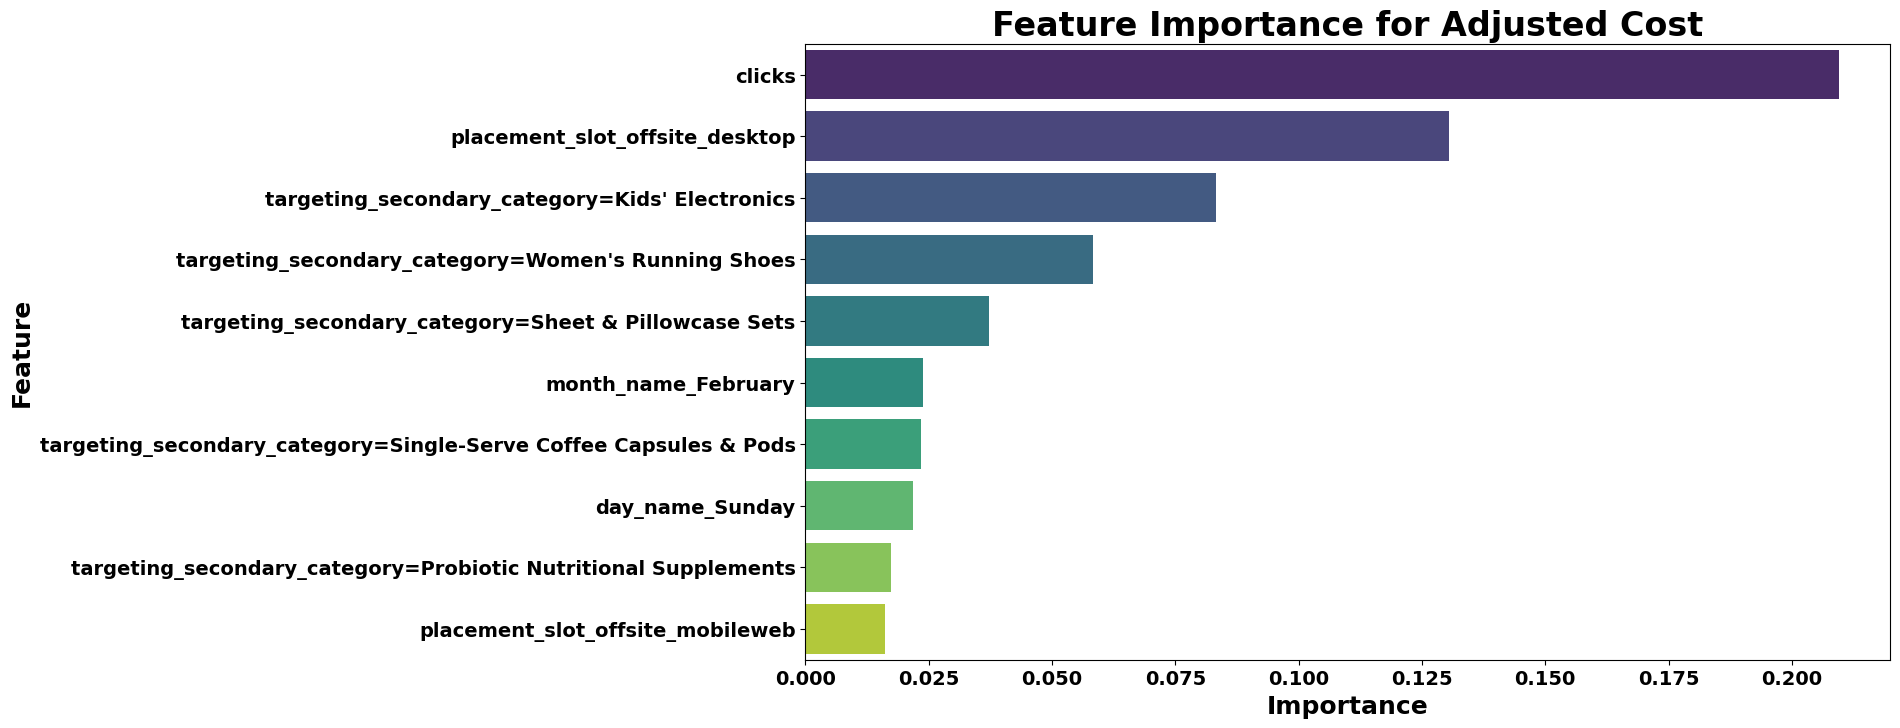

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance data
feature_importance_data = {
    'Feature': [
        'clicks',
        'placement_slot_offsite_desktop',
        'targeting_secondary_category=Kids\' Electronics',
        'targeting_secondary_category=Women\'s Running Shoes',
        'targeting_secondary_category=Sheet & Pillowcase Sets',
        'month_name_February',
        'targeting_secondary_category=Single-Serve Coffee Capsules & Pods',
        'day_name_Sunday',
        'targeting_secondary_category=Probiotic Nutritional Supplements',
        'placement_slot_offsite_mobileweb'
    ],
    'Importance': [
        0.209455, 0.130401, 0.083267, 0.058346, 0.037282, 0.023793, 
        0.023389, 0.021769, 0.017339, 0.016086
    ]
}

# Create DataFrame
df_importance = pd.DataFrame(feature_importance_data)

# Plot feature importance
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=df_importance, palette='viridis')
plt.title('Feature Importance for Adjusted Cost', fontsize=24, fontweight='bold')
plt.xlabel('Importance', fontsize=18, fontweight='bold')
plt.ylabel('Feature', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.show()


Final

/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_76513/4216048680.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_importance, palette='viridis')


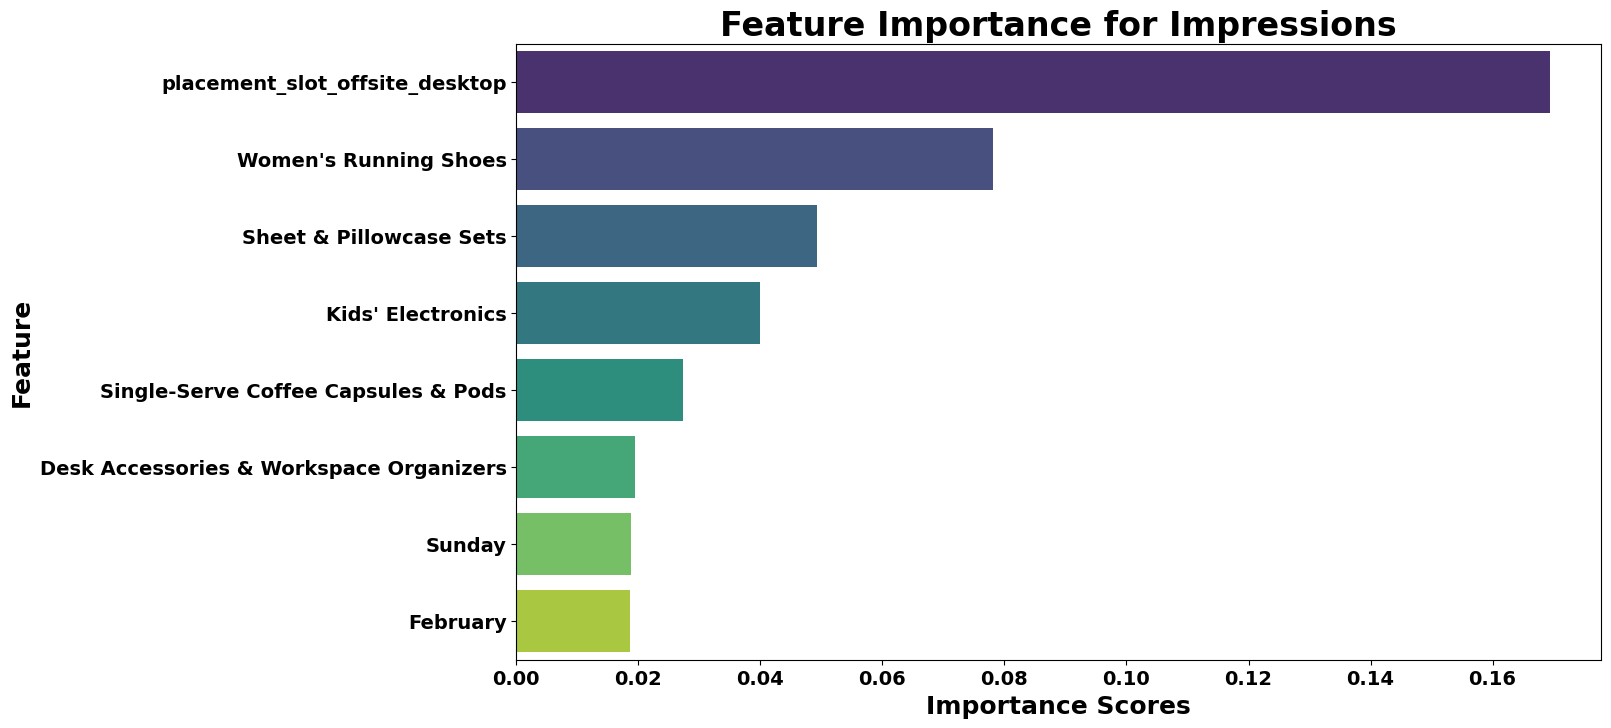

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Feature importance data
feature_importance_data = {
    'Feature': [
        'placement_slot_offsite_desktop',
        'Women\'s Running Shoes',
        'Sheet & Pillowcase Sets',
        'Kids\' Electronics',
        'Single-Serve Coffee Capsules & Pods',
        'Desk Accessories & Workspace Organizers',
        'Sunday',
        'February'
    ],
    'Importance': [
        0.169347, 0.078073, 0.049361, 0.039967, 0.027329, 
        0.019404, 0.018872, 0.018705, 
    ]
}

# Create DataFrame
df_importance = pd.DataFrame(feature_importance_data)

# Plot feature importance
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=df_importance, palette='viridis')
plt.title('Feature Importance for Impressions', fontsize=24, fontweight='bold')
plt.xlabel('Importance Scores', fontsize=18, fontweight='bold')
plt.ylabel('Feature', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.show()
